<a href="https://colab.research.google.com/github/Selva-Subramanian/Playstore-Apps-Review-Analysis/blob/main/Playstore_Apps_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project 1 - Playstore Apps Review Analysis**

## **(Exploratory Data Analysis)**

## <u>**Project by *Selva Subramanian S*** 

### **Data Science Trainee at AlmaBetter**

# <b> Problem Statement

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. 

Each app (row) has values for category, rating, size, and more. Another dataset contains customer reviews of the android apps.

Explore and analyze the data to discover key factors responsible for app engagement and success. 

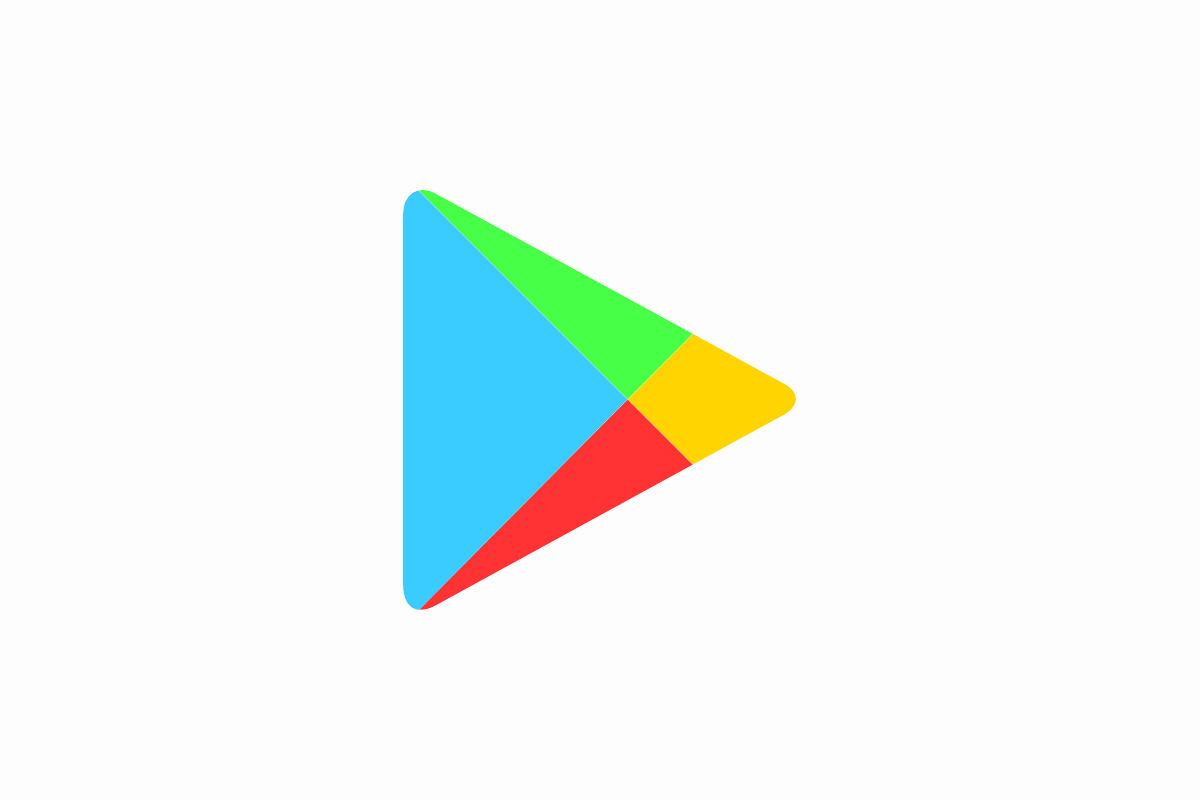

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import the required libraries
import numpy as np                                  # numerical computation
import pandas as pd                                 # data manipulation

import matplotlib.pyplot as plt                     # data visualization
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

from datetime import datetime                       # cast to datetime object
from sklearn.preprocessing import MinMaxScaler      # scale the feature values

import copy                                         # create copies
import warnings                                     # ignore warnings
warnings.filterwarnings('ignore')

In [ ]:
# load the dataset
working_dir_path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter Notebooks/Capstone projects/Playstore Apps Review Analysis - Selva Subramanian S/'
df_apps = pd.read_csv(working_dir_path + 'Copy of Play Store Data.csv')
df_reviews = pd.read_csv(working_dir_path + 'Copy of User Reviews.csv')

### <b> Dataset Inspection

In [ ]:
# sample of the dataset
df_apps.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
# sample of the dataset
df_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
# data summary of the features
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# handling NaN values
df_apps.dropna(axis=0, inplace=True)

In [ ]:
# data summary of the features 
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
# handling NaN values
df_reviews.dropna(axis=0, inplace=True)

In [ ]:
# details of the numerical features  
df_apps.describe()

,Rating
count,9360.000000
mean,4.191838
std,0.515263
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [ ]:
# details of the numerical features
df_reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


### <b> Data Preprocessing

In [ ]:
# copy dataframe
df_apps_cleaned = copy.deepcopy(df_apps)

# clean installs data
df_apps_cleaned['Installs'] = df_apps_cleaned['Installs'].str.replace(',','')
df_apps_cleaned['Installs'] = df_apps_cleaned['Installs'].str.replace('+','')
df_apps_cleaned['Installs'] = df_apps_cleaned['Installs'].replace('Free',np.nan)
df_apps_cleaned['Installs'] = df_apps_cleaned['Installs'].astype(float)

# clean review data
df_apps_cleaned['Reviews'] = df_apps_cleaned['Reviews'].str.replace('M','000000')
df_apps_cleaned['Reviews'] = df_apps_cleaned['Reviews'].astype(float)

# cleaning size data
df_apps_cleaned['Size'] = df_apps_cleaned.Size.replace('Varies with device',np.nan)
df_apps_cleaned['Size'] = df_apps_cleaned.Size.str.replace('k','')
df_apps_cleaned['Size'] = df_apps_cleaned.Size.str.replace('M','000')
df_apps_cleaned['Size'] = df_apps_cleaned.Size.replace('1,000+',np.nan)
df_apps_cleaned['Size'] = df_apps_cleaned.Size.replace('nan',np.nan)
df_apps_cleaned['Size'] = df_apps_cleaned['Size'].astype(float)

# cleaning price data
df_apps_cleaned['Price'] = df_apps_cleaned.Price.replace('Everyone',np.nan)
df_apps_cleaned['Price'] = df_apps_cleaned.Price.str.replace('$','')
df_apps_cleaned['Price'] = df_apps_cleaned['Price'].astype(float)

## <b> Exploratory Data Analysis

#### Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns and drive useful insights from it.

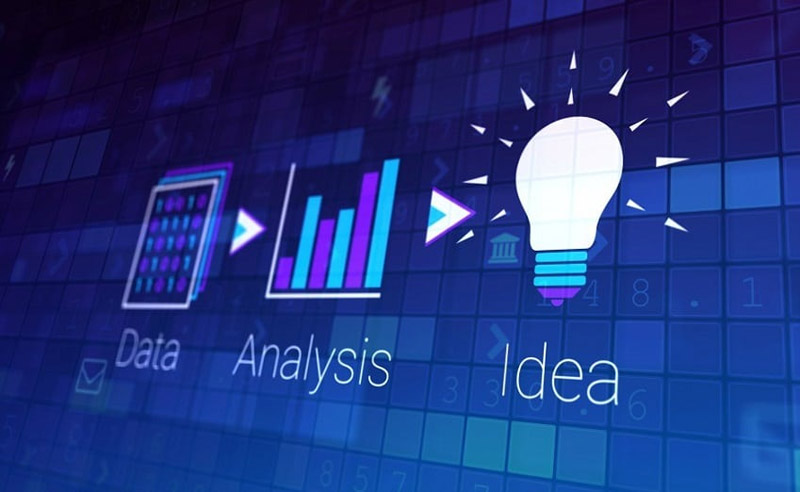

### <b> Data Visualization

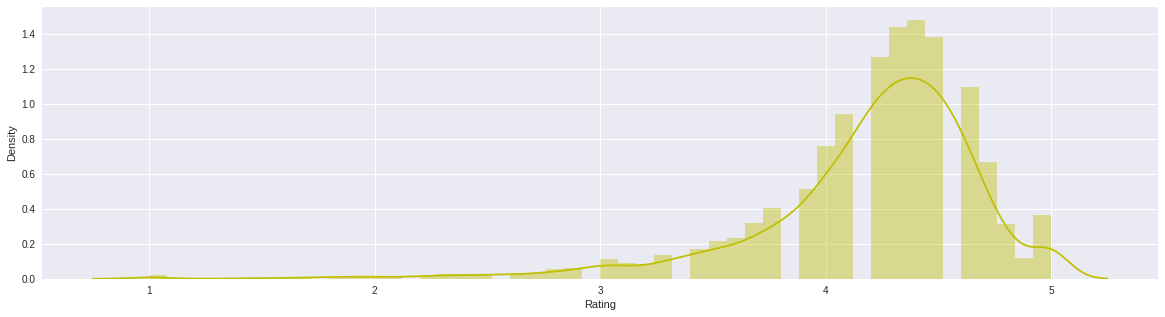

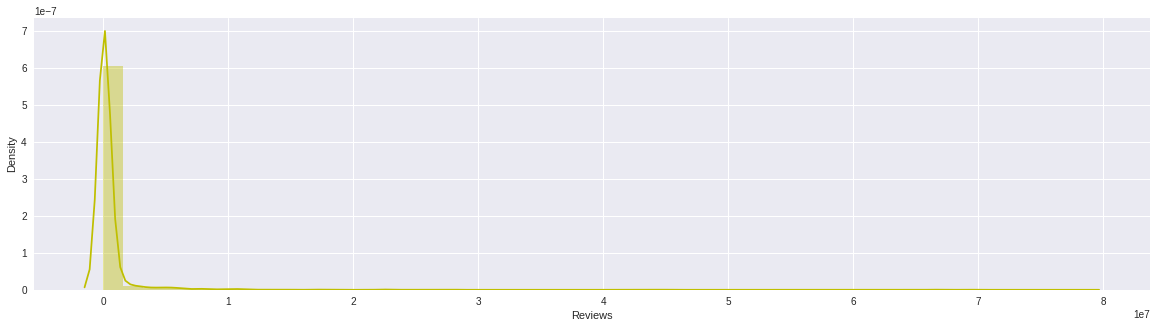

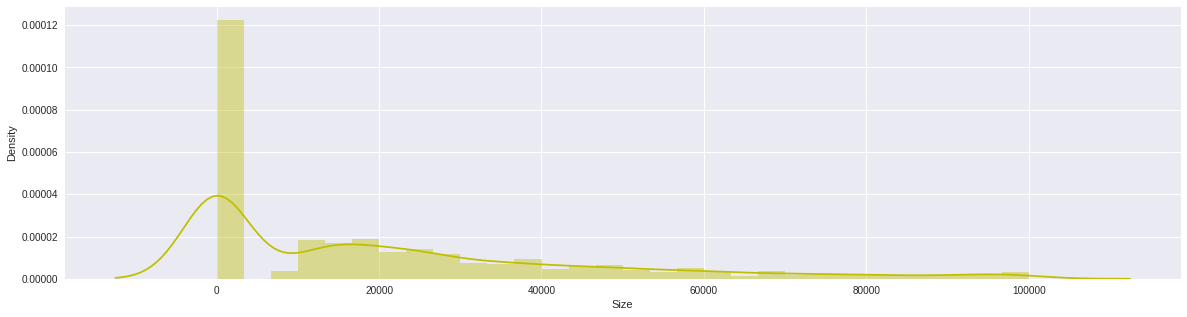

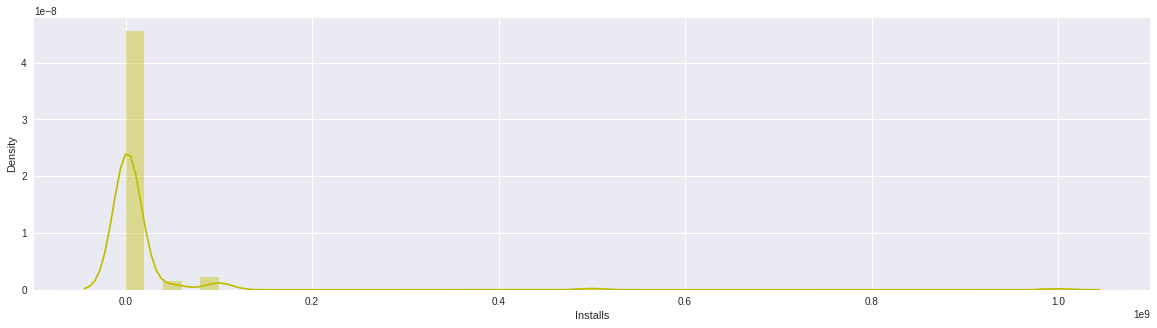

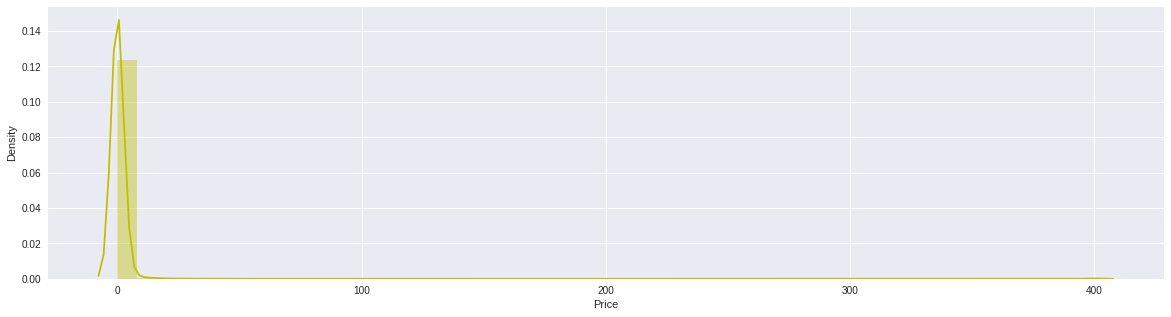

In [ ]:
# data distribution in numeric features of the dataset
for i in df_apps_cleaned.describe().columns:
  plt.figure(figsize=(20,5))
  sns.distplot(df_apps_cleaned[i],color="y")

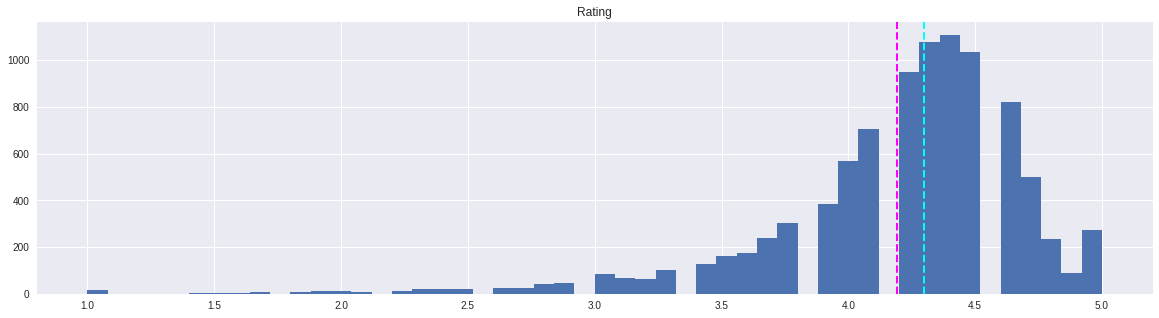

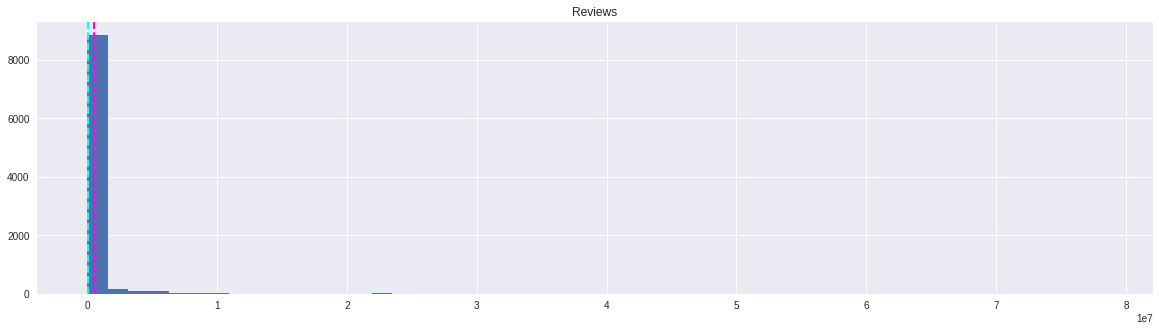

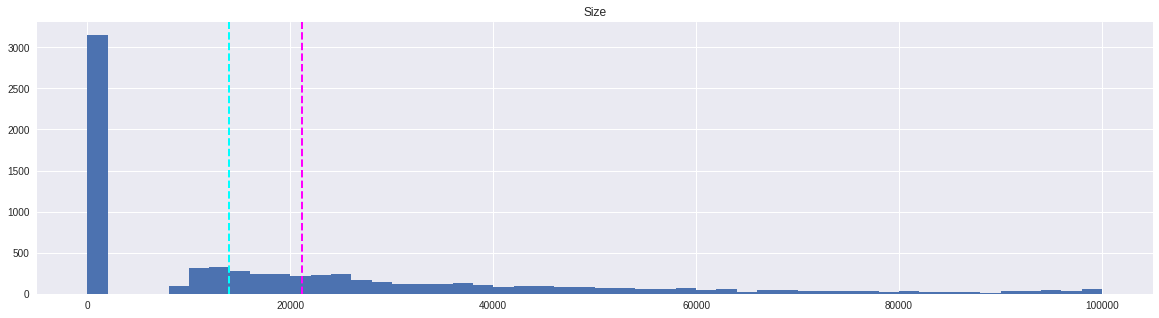

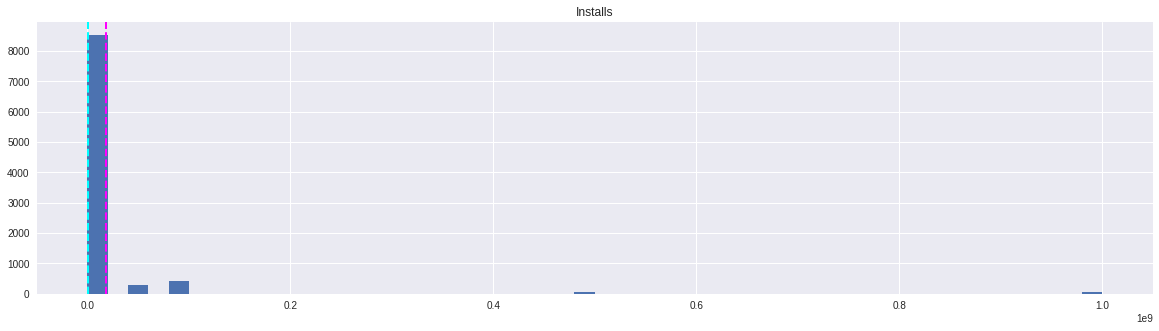

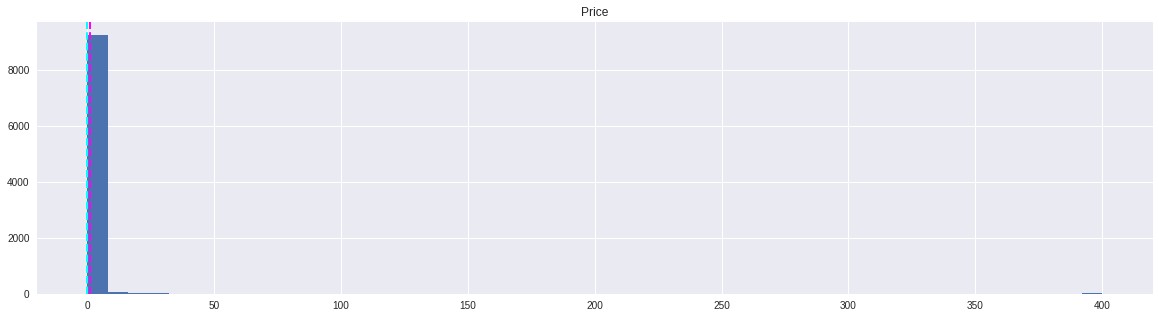

In [ ]:
# skewness, mean and median of the numeric features of the dataset
for col in df_apps_cleaned.describe().columns:
    fig = plt.figure(figsize=(20, 5))
    ax = fig.gca()
    feature = df_apps_cleaned[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

#### The above plots shows the data distribution, mean and median values of the features. 

  * #### Ratings by the users are in the range of 1 and 5, mean and median both around 4.
  * #### Size of the apps are positively skewed with mean near 20 MB and median close to 12 MB.
  * #### The mean and median of price of the apps are around 0.








### <b> Correlation

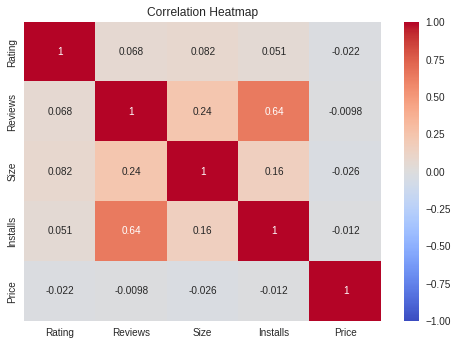

In [ ]:
# correlation between the features in our dataset
sns.heatmap(df_apps_cleaned.corr(),vmin=-1,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### The features 'Reviews' and 'Installs' are correlated, the features 'Reviews and 'Size' are slightly correlated. 
#### There is no other significant correlation.

### <b> Analysis of Categories

In [ ]:
# unique list of categories
df_apps['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
# filter out the odd ones
df_apps = df_apps.loc[df_apps["Category"] != '1.9']

In [ ]:
# percentage distribution of categories
df_apps['Category'].value_counts()*100/df_apps['Category'].value_counts().sum()

FAMILY                 18.653846
GAME                   11.720085
TOOLS                   7.831197
PRODUCTIVITY            3.750000
MEDICAL                 3.739316
COMMUNICATION           3.504274
FINANCE                 3.450855
SPORTS                  3.408120
PHOTOGRAPHY             3.386752
LIFESTYLE               3.354701
PERSONALIZATION         3.333333
BUSINESS                3.237179
HEALTH_AND_FITNESS      3.173077
SOCIAL                  2.767094
SHOPPING                2.542735
NEWS_AND_MAGAZINES      2.489316
TRAVEL_AND_LOCAL        2.414530
DATING                  2.083333
BOOKS_AND_REFERENCE     1.901709
VIDEO_PLAYERS           1.709402
EDUCATION               1.655983
ENTERTAINMENT           1.591880
MAPS_AND_NAVIGATION     1.324786
FOOD_AND_DRINK          1.164530
HOUSE_AND_HOME          0.811966
WEATHER                 0.801282
AUTO_AND_VEHICLES       0.779915
LIBRARIES_AND_DEMO      0.683761
ART_AND_DESIGN          0.651709
COMICS                  0.619658
PARENTING 

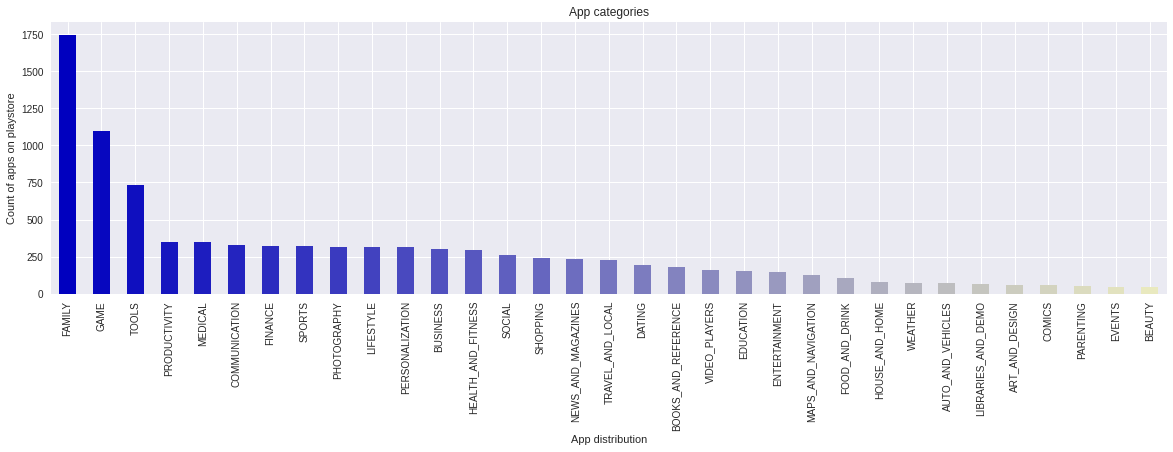

In [ ]:
# visualize distribution of categories
my_colors = ['g', 'b']*5
my_colors = [(0.5,0.4,0.5), (0.75, 0.75, 0.25)]*5 
my_colors = [(x/35.0, x/35.0, 0.75) for x in range(35)]
plt.rcParams['figure.figsize'] = (20,5)
df_apps['Category'].value_counts().plot(kind='bar',color=my_colors)
plt.title('App categories')
plt.xlabel('App distribution')
plt.ylabel('Count of apps on playstore')
plt.show()

#### **Inferences from the above plot:**
*  #### The category Family has the most number of apps.
*  #### The second category after family is games with most number of apps followed by tools, medical, business and so on.
*  #### The least number of apps are in categories beauty comics and parenting.

### <b> Downloads by App Categories <b>

In [ ]:
# dataframe stacked by categories with installs
installs_df_apps = df_apps.groupby('Category')['Installs'].value_counts().unstack()
installs_df_apps

Installs,1+,"1,000+","1,000,000+","1,000,000,000+",10+,"10,000+","10,000,000+",100+,"100,000+","100,000,000+",5+,"5,000+","5,000,000+",50+,"50,000+","50,000,000+",500+,"500,000+","500,000,000+"
Category,,,,,,,,,,,,,,,,,,,
ART_AND_DESIGN,NaN,3.0,4.0,NaN,NaN,11.0,5.0,1.0,18.0,NaN,NaN,3.0,3.0,NaN,6.0,1.0,NaN,6.0,NaN
AUTO_AND_VEHICLES,NaN,8.0,13.0,NaN,NaN,6.0,2.0,3.0,23.0,NaN,NaN,2.0,3.0,NaN,5.0,NaN,3.0,5.0,NaN
BEAUTY,NaN,1.0,8.0,NaN,NaN,10.0,1.0,2.0,6.0,NaN,NaN,3.0,1.0,NaN,4.0,NaN,NaN,6.0,NaN
BOOKS_AND_REFERENCE,NaN,25.0,20.0,1.0,NaN,24.0,24.0,1.0,19.0,6.0,1.0,15.0,10.0,1.0,11.0,NaN,3.0,17.0,NaN
BUSINESS,NaN,39.0,46.0,NaN,6.0,45.0,18.0,24.0,36.0,3.0,2.0,14.0,23.0,3.0,12.0,7.0,13.0,12.0,NaN
COMICS,NaN,1.0,12.0,NaN,NaN,11.0,2.0,1.0,11.0,NaN,NaN,5.0,4.0,NaN,6.0,NaN,NaN,5.0,NaN
COMMUNICATION,NaN,12.0,45.0,19.0,3.0,24.0,57.0,14.0,19.0,39.0,NaN,17.0,25.0,2.0,10.0,10.0,6.0,9.0,17.0
DATING,NaN,10.0,32.0,NaN,1.0,27.0,17.0,11.0,37.0,NaN,NaN,12.0,9.0,NaN,5.0,NaN,8.0,26.0,NaN
EDUCATION,NaN,2.0,52.0,NaN,NaN,5.0,30.0,NaN,20.0,4.0,NaN,NaN,22.0,NaN,6.0,NaN,NaN,14.0,NaN


Text(0, 0.5, 'Number of downloads in that category')

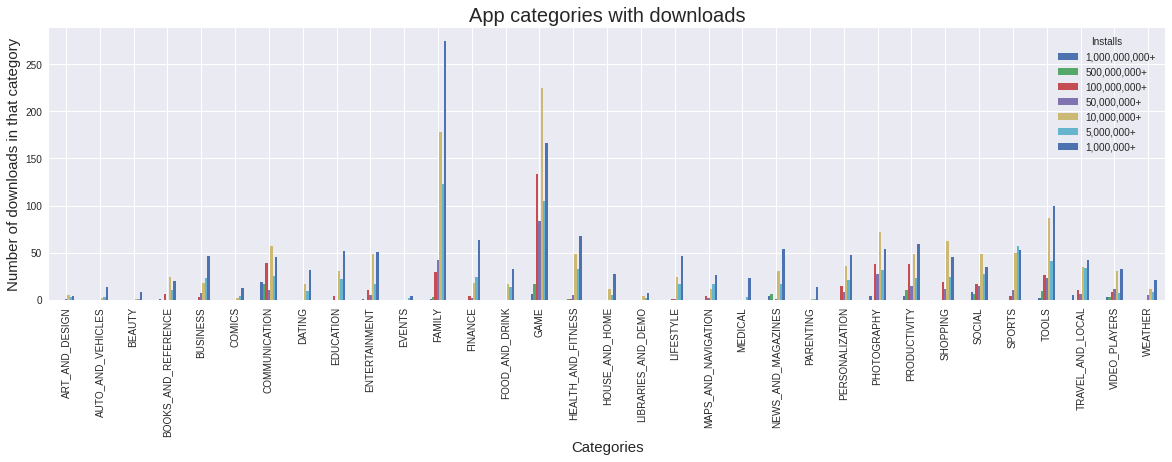

In [ ]:
# visualize the dataframe stacked by categories with installs
installs_df_apps[['1,000,000,000+','500,000,000+','100,000,000+','50,000,000+','10,000,000+','5,000,000+','1,000,000+']].plot(kind='bar')
plt.rcParams['figure.figsize'] = (30,5)
plt.title('App categories with downloads',fontsize=20)
plt.xlabel('Categories',fontsize=15)
plt.ylabel('Number of downloads in that category',fontsize=15)

#### From the plot we can infer that apps from Family and Game categories dominate the playstore in terms of number of apps.
#### Lets deep dive into it and find out what kind of apps they are by exploring their genres.

### <b> Family Category Analysis

In [ ]:
# format the data
df_apps['Genres'].replace('Educational;Education','Education',inplace=True)
df_apps['Genres'].replace('Educational','Education',inplace=True)
df_apps['Genres'].replace('Education;Education','Education',inplace=True)
df_apps['Genres'].replace('Casual;Pretend Play','Casual',inplace=True)

In [ ]:
# dataframe subset of family category
df_apps_family = df_apps[(df_apps['Category']=='FAMILY')]
df_apps_family_genre = df_apps_family['Genres'].value_counts()

# sort the top genres
df_apps_family_genre_top = df_apps_family_genre[df_apps_family['Genres'].value_counts()>20]
print(f'There are {df_apps_family_genre.sum()} apps in the family category')

There are 1746 apps in the family category


Text(0.5, 0, 'Genres')

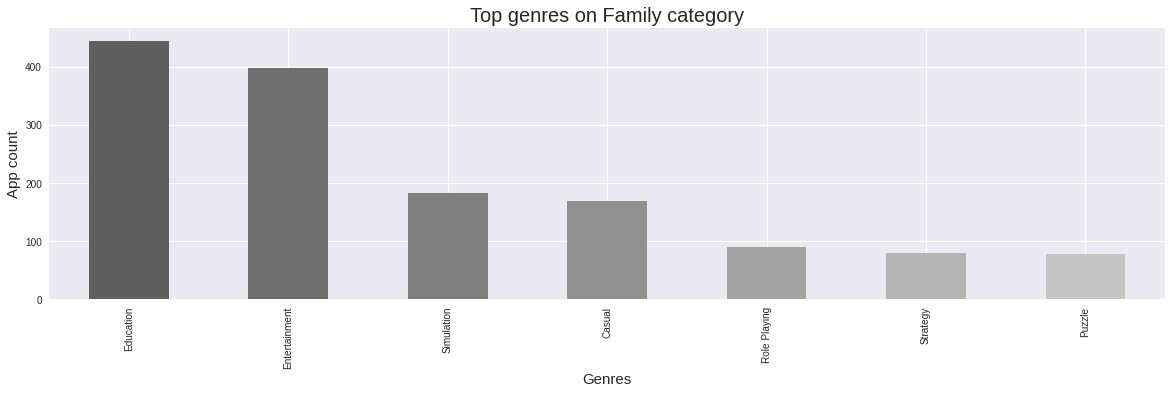

In [ ]:
# plot the sorted genres
plt.rcParams['figure.figsize'] = (20,5)
cmap = plt.get_cmap('Greys')
colours = [cmap(i) for i in list(np.linspace(0.7,0.1,11))]
df_apps_family_genre_top.plot(kind='bar',color=colours)
plt.title('Top genres on Family category',fontsize=20)
plt.ylabel('App count',fontsize=15)
plt.xlabel('Genres',fontsize=15)

### <b> Game Category Analysis

In [ ]:
# format the data
df_apps['Genres'].replace('Adventure;Action & Adventure','Combinations',inplace=True)
df_apps['Genres'].replace('Action;Action & Adventure','Combinations',inplace=True)
df_apps['Genres'].replace('Casual;Brain Games','Combinations',inplace=True)
df_apps['Genres'].replace('Casual;Creativity','Combinations',inplace=True)

df_apps['Genres'].replace('Casual;Pretend Play','Combinations',inplace=True)
df_apps['Genres'].replace('Simulation;Education','Combinations',inplace=True)
df_apps['Genres'].replace('Simulation;Action & Adventure','Combinations',inplace=True)
df_apps['Genres'].replace('Casual;Action & Adventure','Combinations',inplace=True)

In [ ]:
# dataframe subset of game category
df_apps_game = df_apps[df_apps['Category']=='GAME']
df_apps_game_genre = df_apps_game['Genres'].value_counts()

# sort the top genres
df_apps_game_genre_top = df_apps_game_genre[df_apps_game['Genres'].value_counts()>20]
print(f'There are {df_apps_game_genre.sum()} apps in the game category')

There are 1097 apps in the game category


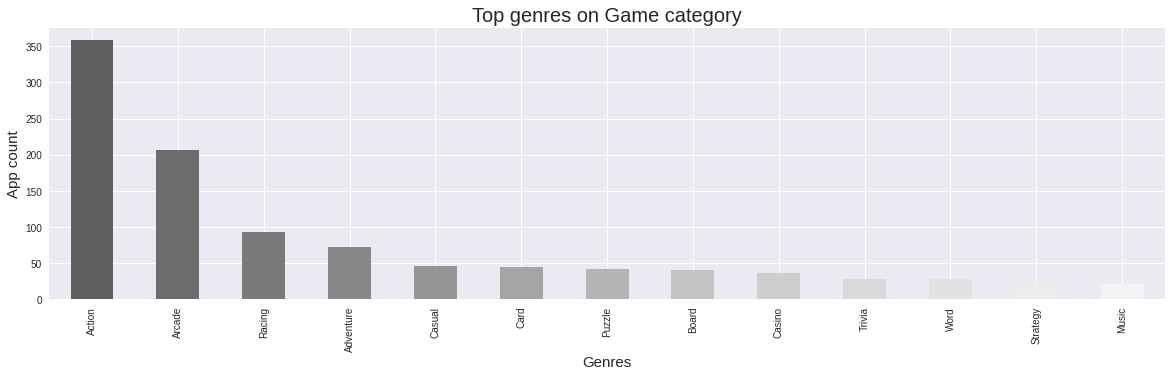

In [ ]:
# plot the sorted genres
plt.rcParams['figure.figsize'] = (20,5)
colours = [cmap(i) for i in list(np.linspace(0.7,0.1,13))]
df_apps_game_genre_top.plot(kind='bar',color=colours)
plt.title('Top genres on Game category',fontsize=20)
plt.ylabel('App count',fontsize=15)
plt.xlabel('Genres',fontsize=15)
plt.show()

### <b> Billion+ downloads

In [ ]:
# list of apps with billion+ downloads
df_apps_1B = df_apps[df_apps['Installs']=='1,000,000,000+']
_1B = df_apps_1B['App'].unique()
_1B

array(['Google Play Books', 'Messenger – Text and Video Chat for Free',
       'WhatsApp Messenger', 'Google Chrome: Fast & Secure', 'Gmail',
       'Hangouts', 'Skype - free IM & video calls', 'Google Play Games',
       'Subway Surfers', 'Facebook', 'Instagram', 'Google+',
       'Google Photos', 'Maps - Navigate & Explore', 'Google Street View',
       'Google', 'Google Drive', 'YouTube', 'Google Play Movies & TV',
       'Google News'], dtype=object)

In [ ]:
# dataframe subset with billion+ downloads
df_apps_1Billion = df_apps[df_apps['App'].isin(_1B)]
df_apps_1Billion.drop(['Reviews','Last Updated'],axis=1,inplace=True)
df_apps_1Billion = df_apps_1Billion.drop_duplicates()
df_apps_1Billion['Installs'].replace('1,000,000,000+','1B+',inplace=True)

In [ ]:
# apps with 1B+ installs
df_apps_1Billion = df_apps_1Billion[['App','Category','Installs']].reset_index()
df_apps_1Billion.drop('index',axis=1,inplace=True)
df_apps_1Billion.set_index('App')

,Category,Installs
App,,
Google Play Books,BOOKS_AND_REFERENCE,1B+
Messenger – Text and Video Chat for Free,COMMUNICATION,1B+
WhatsApp Messenger,COMMUNICATION,1B+
Google Chrome: Fast & Secure,COMMUNICATION,1B+
Gmail,COMMUNICATION,1B+
Hangouts,COMMUNICATION,1B+
Skype - free IM & video calls,COMMUNICATION,1B+
Google Play Games,ENTERTAINMENT,1B+
Subway Surfers,GAME,1B+


Text(0.5, 0, 'Categories')

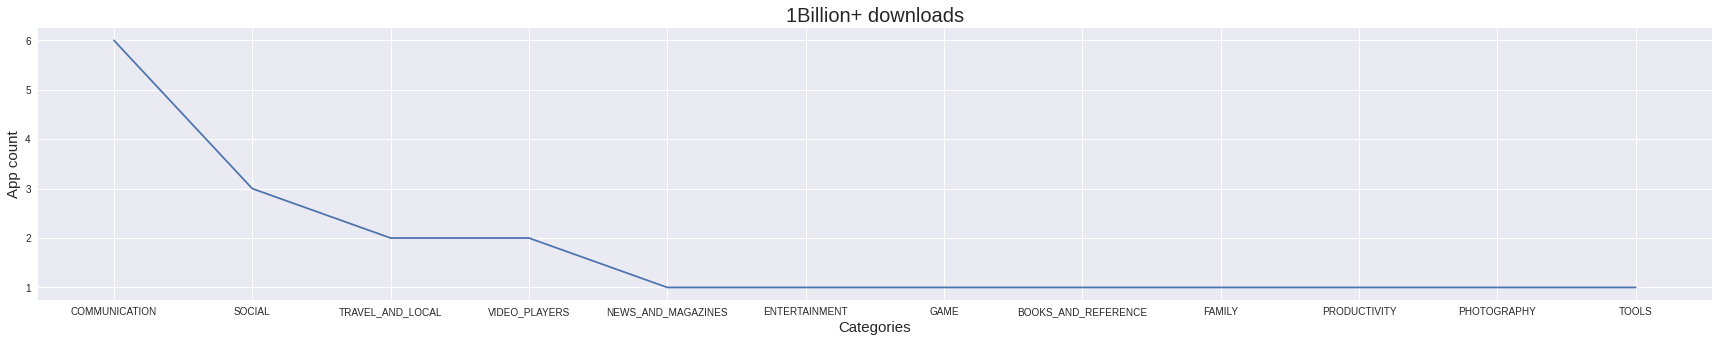

In [ ]:
# plot app categories with 1B+ installs
plt.rcParams['figure.figsize'] = (30,5)
sns.lineplot(data=df_apps_1Billion['Category'].value_counts())
plt.title('1Billion+ downloads',fontsize=20)
plt.ylabel('App count',fontsize=15)
plt.xlabel('Categories',fontsize=15)

#### Apps from the categories family and gaming dominate the playstore in numbers but apps under communication catergory is more popular with highest number of downloads.

#### 6 apps from communication category has more than a billion plus installs, only 2 apps each from family and game categories have more than a billion download.

### **Top rated apps**

In [ ]:
# format the installs data
df_apps_r = df_apps
df_apps_r['Installs'] = df_apps['Installs'].str.replace(',','')
df_apps_r['Installs'] = df_apps['Installs'].str.replace('+','')
df_apps_r['Installs'] = df_apps['Installs'].replace('Free',np.nan)
df_apps_r['Installs'] = df_apps['Installs'].astype(float)

In [ ]:
# subset the top rated apps
df_apps_r = df_apps_r[(df_apps['Installs']>100000000)]
df_apps_r = df_apps_r[df_apps_r['Rating']>4.5]

In [ ]:
# top rated apps with 100 million plus downloads
df_apps_r = df_apps_r[['App','Category','Rating','Installs']].reset_index()
df_apps_r = df_apps_r.drop('index', axis = 1)
df_apps_r['Installs'] = df_apps_r['Installs'].astype(str)
df_apps_r['Installs'].replace('500000000.0','100M+',inplace=True)
df_apps_r['Installs'].drop_duplicates(inplace=True)
df_apps_r.set_index('App')

,Category,Rating,Installs
App,,,
Google Duo - High Quality Video Calls,COMMUNICATION,4.6,100M+
SHAREit - Transfer & Share,TOOLS,4.6,100M+
Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,100M+
Google Duo - High Quality Video Calls,COMMUNICATION,4.6,100M+
SHAREit - Transfer & Share,TOOLS,4.6,100M+
"Security Master - Antivirus, VPN, AppLock, Booster",TOOLS,4.7,100M+


#### Top 5 apps with highest ratings and atleast 100 million downloads.

### **Most Reviewed Apps**

In [ ]:
# format the review data
df_apps['Reviews'] = df_apps['Reviews'].str.replace('M','000000')
df_apps['Reviews'] = df_apps['Reviews'].astype(float)

In [ ]:
# sort by descending order
df_apps_review = df_apps['Reviews'].sort_values(ascending=False)[0:15].reset_index()

In [ ]:
# subset by apps with most reviews
df_apps_review = df_apps.loc[df_apps_review['index']]

In [ ]:
# drop duplicates
df_apps_reviews_unique = df_apps_review.drop('Reviews',axis=1)
df_apps_reviews_unique = df_apps_reviews_unique.drop_duplicates().reset_index()

In [ ]:
# most reviewed apps
df_apps_review.loc[df_apps_reviews_unique['index']].set_index('App')

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Facebook,SOCIAL,4.1,78158306.0,Varies with device,1.000000e+09,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
Instagram,SOCIAL,4.5,66577446.0,Varies with device,1.000000e+09,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
Clash of Clans,GAME,4.6,44893888.0,98M,1.000000e+08,Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up


#### Clash of Clans from game category occupies the 5th position in user reviews, while the most reviewed top 4 apps all belongs to Meta Platforms, 2 apps each from social and communication categories.

### <b> Price Analysis

In [ ]:
# format the price data
df_apps['Price'] = df_apps.Price.replace('Everyone',np.nan)
df_apps['Price'] = df_apps.Price.str.replace('$','').astype(float)

In [ ]:
# subset the data by price
df_apps_20 = df_apps[(df_apps['Price']>1)]
df_apps_20 = df_apps[(df_apps['Price']<=20)]
df_apps_20plus = df_apps[(df_apps['Price']>20)]

# apps with price less than $20
df_apps_price_20 = df_apps_20['Price']
# apps with price greater than $20
df_apps_price_20plus = df_apps_20plus['Price']

In [ ]:
print(f'There are {len(df_apps_price_20)} apps in price range $1 to $20' )
print(f'There are {len(df_apps_price_20plus)} apps above the price of $20')

There are 9328 apps in price range $1 to $20
There are 32 apps above the price of $20


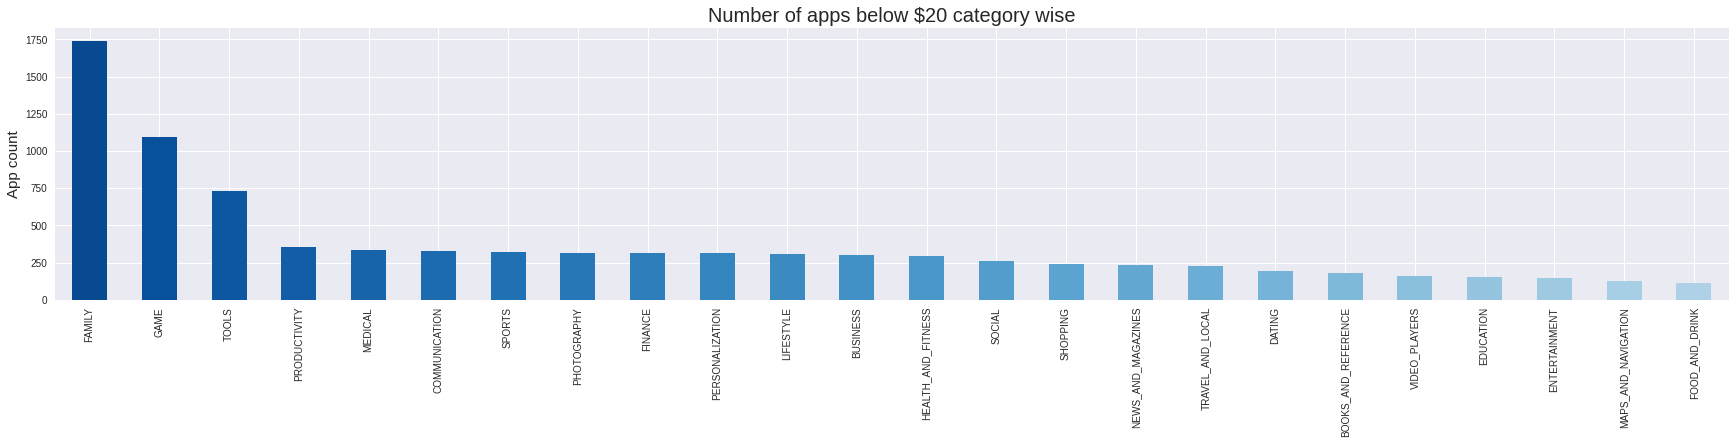

In [ ]:
# plot apps with price less than $20 category wise
df_apps_20 = df_apps_20['Category'].value_counts()
cmap = plt.get_cmap('Blues')
colours = [cmap(i) for i in list(np.linspace(0.9,0.1,33))]
df_apps_20[df_apps['Category'].value_counts()>100].plot(kind='bar',color=colours)
plt.rcParams['figure.figsize'] = (30,5)
plt.title('Number of apps below $20 category wise',fontsize=20)
plt.ylabel('App count',fontsize=15)
plt.show()

In [ ]:
# apps with price greater than $20 and 10k+ installs
df_apps_20plus = df_apps_20plus[df_apps_20plus['Installs']>10000]
df_apps_20plus = df_apps_20plus[['App','Category','Price','Installs']]
df_apps_20plus = df_apps_20plus.sort_values(by='Price',ascending=False)
df_apps_20plus.drop_duplicates().set_index('App')

,Category,Price,Installs
App,,,
I am rich,LIFESTYLE,399.99,100000.0
I Am Rich Premium,FINANCE,399.99,50000.0
Golfshot Plus: Golf GPS,SPORTS,29.99,50000.0
Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,24.99,100000.0


### <b> Content Rating

In [ ]:
# app content by age
df_apps_content = df_apps['Content Rating'].value_counts()

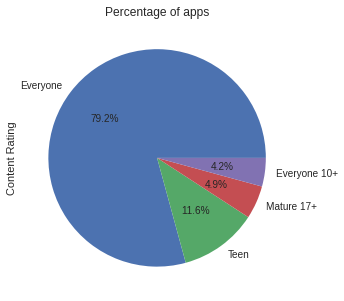

In [ ]:
# plot the percentage of app contents
df_apps_content = df_apps['Content Rating'].value_counts()
df_apps_c = df_apps_content[df_apps['Content Rating'].value_counts()>100]
plt.title('Percentage of apps')
df_apps_c.plot.pie(autopct="%.1f%%")
plt.show()

### <b> Last updated

In [ ]:
# filter out the odd one
df_apps.drop(df_apps[df_apps['Last Updated']=='1.0.19'].index,inplace=True)

In [ ]:
# format string to datetime object
df_apps['Update Date'] = df_apps['Last Updated'].apply(lambda x: datetime.strptime(x,'%B %d, %Y'))

In [ ]:
# sort by recent update
df_apps.sort_values('Update Date',ascending=False,inplace=True)
df_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Update Date
10718,BankNordik,FINANCE,3.9,28.0,15M,5000.0,Free,0.00,Everyone,Finance,"August 8, 2018",7.3.2,5.0 and up,2018-08-08
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334.0,27M,50000000.0,Free,0.00,Teen,Action,"August 8, 2018",1.1.2,4.1 and up,2018-08-08
10712,Lalafo Pulsuz Elanlar,SHOPPING,4.4,61392.0,Varies with device,1000000.0,Free,0.00,Everyone,Shopping,"August 8, 2018",Varies with device,Varies with device,2018-08-08
10209,Video Downloader For FB: Save FB Videos 2018,TOOLS,4.3,434.0,3.6M,50000.0,Free,0.00,Everyone,Tools,"August 8, 2018",1.1.9,4.0.3 and up,2018-08-08
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35.0,2.4M,1000.0,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up,2018-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8084,Freecell CY,GAME,4.0,387.0,1.1M,50000.0,Free,0.00,Everyone,Card,"April 16, 2011",1.3.3,1.6 and up,2011-04-16
8418,DEER HUNTER CHALLENGE,GAME,3.7,38767.0,4.1M,5000000.0,Free,0.00,Everyone 10+,Action,"April 11, 2011",1.4.3,2.0 and up,2011-04-11
10282,FD Shift Calendar Widget,TOOLS,4.1,981.0,73k,100000.0,Free,0.00,Everyone,Tools,"March 16, 2011",1.2.4,1.6 and up,2011-03-16
7430,CJ Poker Odds Calculator,GAME,4.1,207.0,116k,50000.0,Free,0.00,Everyone,Card,"January 30, 2011",1.2,1.6 and up,2011-01-30


In [ ]:
# function to return app updates and total downloads of the year
def appcount_downloads(ad, i):
  app = len(df_apps[df_apps['Update Date'].dt.year==i]['App'].unique())
  download = df_apps[df_apps['Update Date'].dt.year==i]['Installs'].sum()
  ad.append((i,app,download))
  print(f'For the year {i} app count:{app} downloads:{download}')  
  return ad

In [ ]:
# app updates and total downloads of the years
ad = []
years = [2010,2011,2012,2013,2014,2015,2016,2017,2018]
for i in years:
  appcount_downloads(ad, i)

For the year 2010 app count:1 downloads:100000.0
For the year 2011 app count:15 downloads:17407100.0
For the year 2012 app count:21 downloads:13990050.0
For the year 2013 app count:91 downloads:102176110.0
For the year 2014 app count:184 downloads:269892270.0
For the year 2015 app count:380 downloads:424423820.0
For the year 2016 app count:628 downloads:1401262550.0
For the year 2017 app count:1427 downloads:4068484337.0
For the year 2018 app count:5449 downloads:161328155701.0


In [ ]:
# create dataframe with year, app updates and total download of the year
df_update = pd.DataFrame(ad,columns=['year','Updated app','downloads'])
df_update['Updated app'] = df_update['Updated app'].apply(lambda x: x*100/df_update['Updated app'].sum())
df_update['downloads'] = df_update['downloads'].apply(lambda x: x*100/df_update['downloads'].sum())

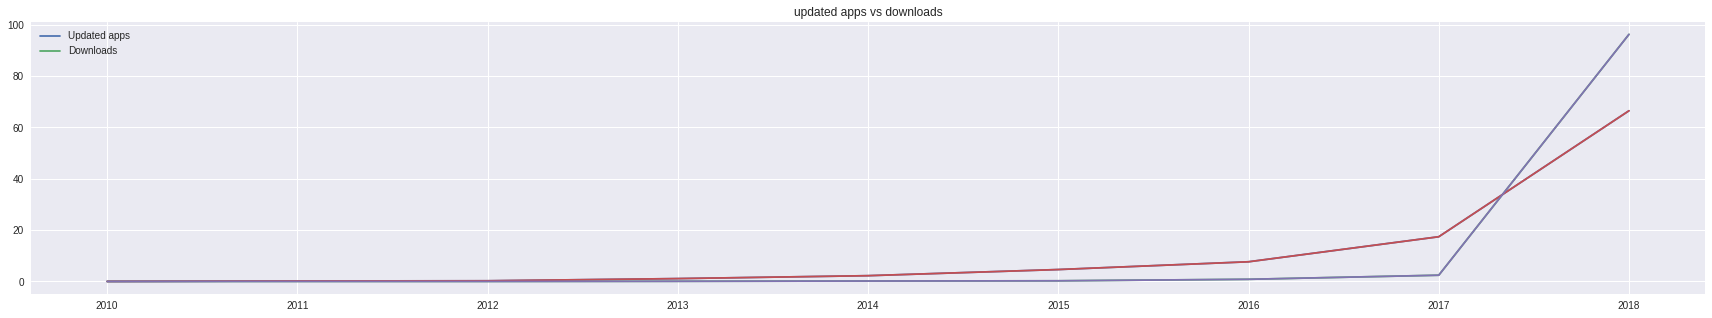

In [ ]:
# visualize the dataframe
x = [2010,2011,2012,2013,2014,2015,2016,2017,2018]
y = df_update[['Updated app','downloads']]
lines = plt.plot(x, y)
plt.legend(lines[:2], ['Updated apps', 'Downloads'])
plt.title('updated apps vs downloads')
plt.plot(x,y)
plt.show()

### <b> App Reviews Analysis

In [ ]:
# merge both datasets by App
df = pd.merge(df_apps,df_reviews,how='inner',on='App')

In [ ]:
# drop NaN values
df = df.dropna(axis=0)

In [ ]:
# sample of the merged dataset
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Update Date,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Fun Kid Racing - Motocross,FAMILY,4.1,59768.0,Varies with device,10000000.0,Free,0.0,Everyone,Racing;Action & Adventure,"August 7, 2018",3.53,4.2 and up,2018-08-07,Why like exist playstore?! Does Google even re...,Negative,-0.500,0.400000
1,Fun Kid Racing - Motocross,FAMILY,4.1,59768.0,Varies with device,10000000.0,Free,0.0,Everyone,Racing;Action & Adventure,"August 7, 2018",3.53,4.2 and up,2018-08-07,We loved game especially little brother . Thumbs,Negative,-0.025,0.733333
2,Fun Kid Racing - Motocross,FAMILY,4.1,59768.0,Varies with device,10000000.0,Free,0.0,Everyone,Racing;Action & Adventure,"August 7, 2018",3.53,4.2 and up,2018-08-07,£104 unlock content?! Bloody trap!!! Absolutel...,Negative,-1.000,0.950000
3,Fun Kid Racing - Motocross,FAMILY,4.1,59768.0,Varies with device,10000000.0,Free,0.0,Everyone,Racing;Action & Adventure,"August 7, 2018",3.53,4.2 and up,2018-08-07,Too many ads. Kids lose interest second add,Positive,0.250,0.250000
4,Fun Kid Racing - Motocross,FAMILY,4.1,59768.0,Varies with device,10000000.0,Free,0.0,Everyone,Racing;Action & Adventure,"August 7, 2018",3.53,4.2 and up,2018-08-07,This game fantastic good game,Positive,0.075,0.575000


### <b> Sentiment Analysis

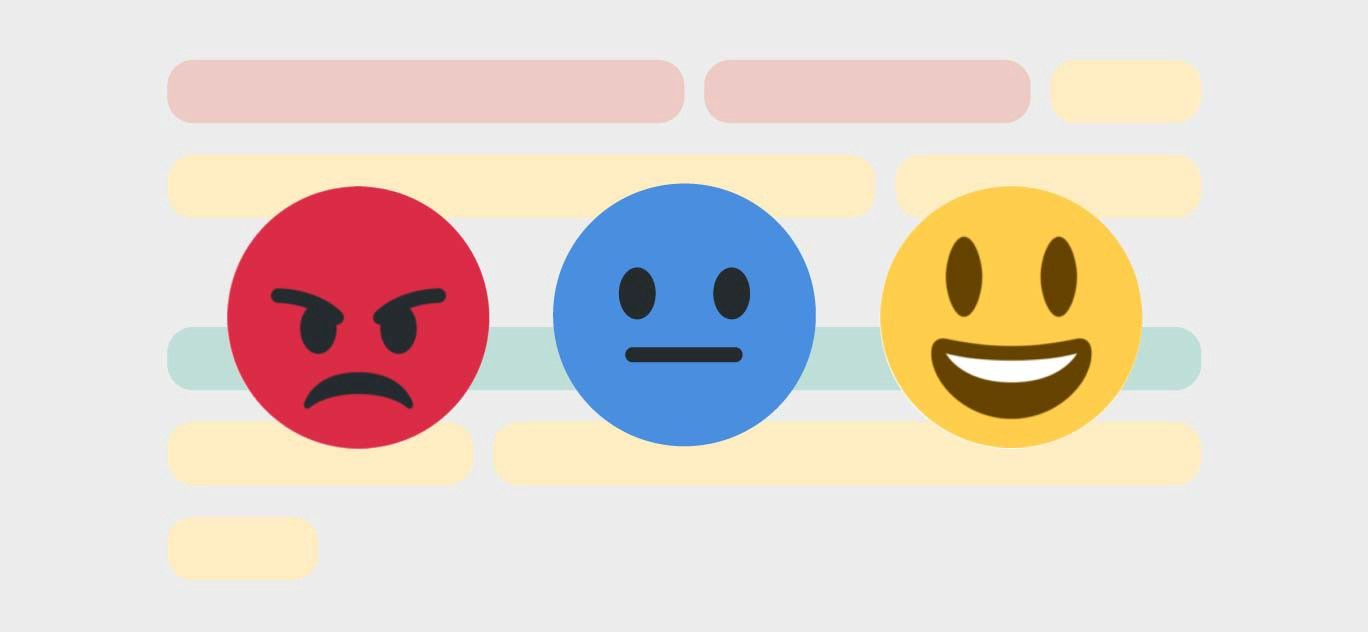

In [ ]:
# sentiment of the reviews
df['Sentiment'].value_counts()

Positive    46164
Negative    18130
Neutral      8272
Name: Sentiment, dtype: int64

In [ ]:
# store the values in variables
positive = df['Sentiment'].value_counts()[0]
negative = df['Sentiment'].value_counts()[1]
neutral = df['Sentiment'].value_counts()[2]

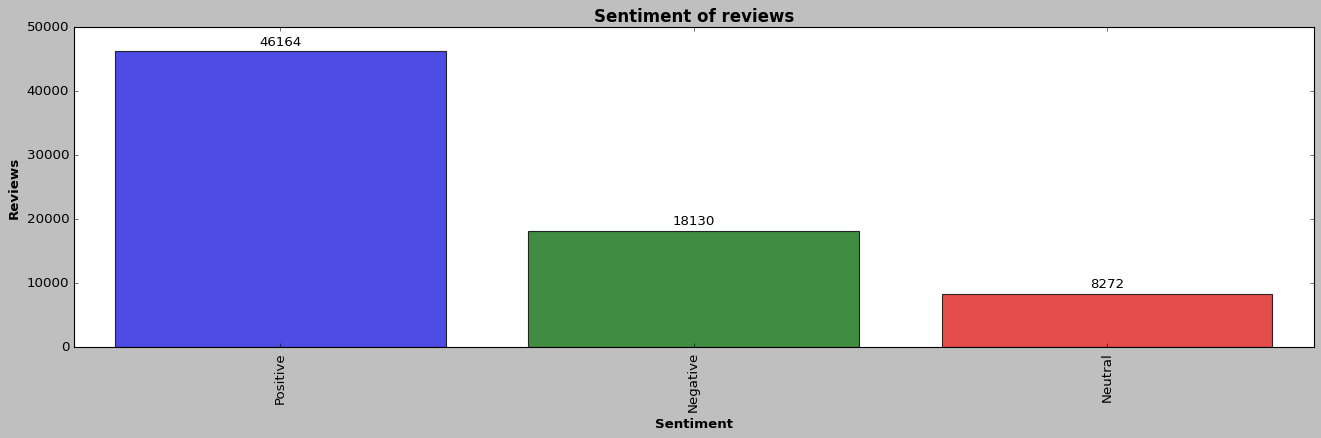

In [ ]:
# set labels and values
feature_names = ['Positive', 'Negative', 'Neutral']
feature_count = [positive, negative, neutral]

# plot the sentiment of reviews
plt.style.use('classic')
f, ax = plt.subplots(1,1, figsize=(20,5))
splot = sns.barplot(x=feature_names, y=feature_count, alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Sentiment of reviews',weight='bold', size=15)
plt.ylabel('Reviews', size=12, weight='bold')
plt.xlabel('Sentiment', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

### <b> Polarity and Subjectivity Analysis

In [ ]:
# function to categorize polarity
def polarity_categorized(x):
  if x < -0.5:
    polarity = 'High negative polarity'
  elif x >= -0.5 and x < 0:
    polarity = 'Low negative polarity'
  elif x >= 0 and x < 0.5:
    polarity = 'Low positive polarity'
  else:
    polarity = 'High positive polarity'
  return polarity

# function to categorize subjectivity
def subjectivity_categorized(x):    
  if x < 0.25:
    subjectivity = 'Low subjectivity'
  elif x >= 0.25 and x < 0.5:
    subjectivity = 'Moderate subjectivity'
  elif x >= 0.5 and x < 0.75:
    subjectivity = 'High subjectivity'
  else:
    subjectivity = 'Extreme subjectivity'
  return subjectivity 

In [ ]:
# apply the functions and create new features 
df['Polarity'] = df['Sentiment_Polarity'].apply(lambda x: polarity_categorized(x))
df['Subjectivity'] = df['Sentiment_Subjectivity'].apply(lambda x: subjectivity_categorized(x))

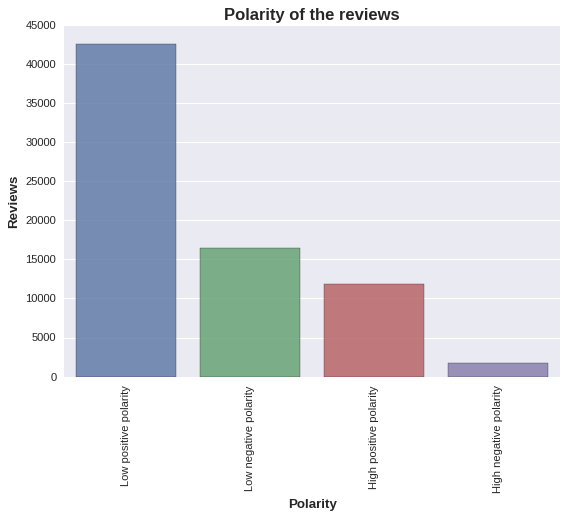

In [ ]:
# plot polarity of the reviews
polarity = ['Low positive polarity', 'Low negative polarity', 'High positive polarity', 'High negative polarity']
plt.style.use('seaborn')
splot = sns.barplot(x=polarity, y=df['Polarity'].value_counts(), alpha=0.8)
plt.title('Polarity of the reviews',weight='bold', size=15)
plt.ylabel('Reviews', size=12, weight='bold')
plt.xlabel('Polarity', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# inference from the Polarity feature
dftn = df.groupby('Polarity')['Sentiment'].value_counts().unstack().drop(['Neutral','Positive'],axis=1).dropna(axis=0)
print(f'There are {int(dftn.iloc[0,-1])} negative reviews indicating slight disappointment and {int(dftn.iloc[1,-1])} highly critical reviews from the users\n')
dftp = df.groupby('Polarity')['Sentiment'].value_counts().unstack().drop(['Neutral','Negative'],axis=1).dropna(axis=0)
print(f'There are {int(dftp.iloc[1,-1])} reviews with slight positive sentiment and {int(dftp.iloc[0,-1])} reviews indicating appreciations from the users')

There are 1688 negative reviews indicating slight disappointment and 16442 highly critical reviews from the users

There are 34266 reviews with slight positive sentiment and 11898 reviews indicating appreciations from the users


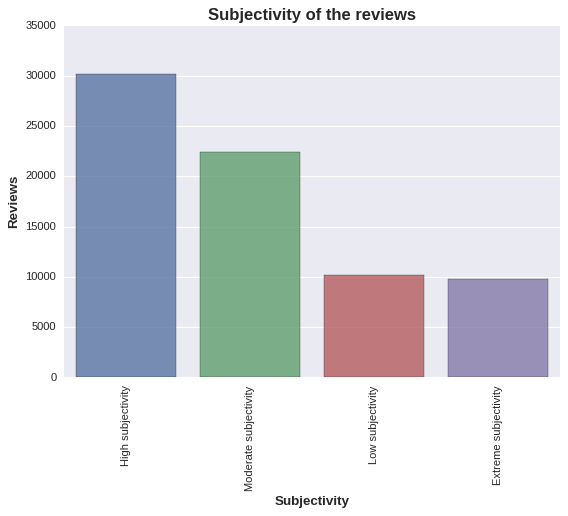

In [ ]:
# plot subjectivity of the reviews
subjectivity = ['High subjectivity', 'Moderate subjectivity', 'Low subjectivity', 'Extreme subjectivity']
splot = sns.barplot(x=subjectivity, y=df['Subjectivity'].value_counts(), alpha=0.8)
plt.title('Subjectivity of the reviews',weight='bold', size=15)
plt.ylabel('Reviews', size=12, weight='bold')
plt.xlabel('Subjectivity', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# subjectivity by sentiment of the reviews
df.groupby('Sentiment')['Subjectivity'].value_counts().unstack()

Subjectivity,Extreme subjectivity,High subjectivity,Low subjectivity,Moderate subjectivity
Sentiment,,,,
Negative,2447,7405,1237,7041
Neutral,254,548,7038,432
Positive,7057,22232,1940,14935


### **Conclusion**
  * The dataset was loaded, a sample of the dataset was viewed, data summary and details of the numerical features were observed.
  * Data was pre-processed by formatting and casting into appropriate datatypes and the data distribution and correlations were visualized.
  * Various milestones such as top categories, top genres in top categories, highly rated apps, most reviewed apps, category wise price analysis, target age of the user and impact of software updates were achieved by Exploratory Data Analysis (EDA) on features namely Category, Genres, Installs, Ratings, Review, Price, Content Ratings and Last Updated respectively. 
  * Two data visualization libraries matplotlib and seaborn was used to plot appropriate graphs to help in the analysis.
  * The review data was merged with the playstore data on the feature App and EDA on the Sentiment, Polarity and Subjectivity of the reviews were carried out.



